# 영상 데이터 2진 분류 by vanilla CNN template

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...     
```

In [26]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/dogs_prepared_2_category.tar.gz
!ls -al  

--2021-09-28 09:29:59--  https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/dogs_prepared_2_category.tar.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/dogs_prepared_2_category.tar.gz [following]
--2021-09-28 09:30:00--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/dogs_prepared_2_category.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15688012 (15M) [application/octet-stream]
Saving to: ‘dogs_prepared_2_category.tar.gz’

dogs_prepared_2_cat 100%[===================>]  14.96M  --.-KB/s    

In [27]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared_2_category.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/test/
dogs_prepared/test/n02088094-Afghan_hound/
dogs_prepared/test/n02088094-Afghan_hound/n02088094_8290.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_908.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_7106.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_7683.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_890.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_913.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_907.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_9523.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_7146.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_5855.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_7229.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_688.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_5812.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_7260.jpg
dogs_prepared/test/n02088094-Afghan_hound/n02088094_6485.jpg
dogs_prepare

# Template

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 128)    

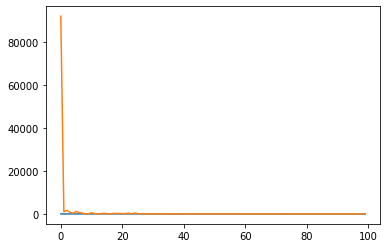

1/1 [==============================] - 0s 212ms/step - loss: 0.7162 - acc: 0.8193          
loss= 0.7161829471588135
acc= 0.8192771077156067


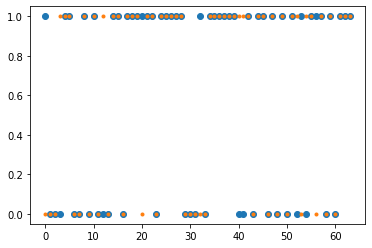

label category index = 1.0
predicted category index = 0
predicted category name = n02087046-toy_terrier


In [34]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

model = models.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=100
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int).squeeze()

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])
